In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import cluster, mixture
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

In [2]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['figure.dpi'] = 300

## This file contains the code for modeling and simulations of Switching and Potential Models.

In [3]:
def func(x,r=.1,C1=1,C2=2,C3=3):
    return r*x*(C1-x)*(C2-x)*(C3-x)

In [4]:
def Upot(x,r=.1,C1=1,C2=2,C3=3):
    return -(r/2.0)*C1*C2*C3*x**2+(r/3.0)*(C1*C2+C1*C3+C2*C3)*x**3-(r/4.0)*(C1+C2+C3)*x**4+(r/5.0)*x**5

In [5]:
def Upot2(x,r=.1,C0=0,C1=2.4,C2=2.5,C3=3.6):
    return -((1/4.0)*r*x**4*(-C0+C1+C2+C3) + (1/3.0)*r*x**3*(C0*(C1+C2+C3)-C1*(C2+C3)-C2*C3) + (1/2.0)*r*x**2*(-C0*C1*(C2+C3)-C0*C2*C3+C1*C2*C3) + C0*C1*C2*C3*r*x - (r*x**5)/5.0)

In [6]:
def Upot3(x,a0=0,a1=1,a2=1,a3=1,a4=1):
    return a0+a1*x+a2*x**2+a3*x**3+a4*x**4

In [7]:
def Upot4(x,a0=0,a1=1,a2=1,a3=1,a4=1,a5=1,a6=1):
    return a0+a1*x+a2*x**2+a3*x**3+a4*x**4+a5*x**5+a6*x**6

In [8]:
def force4(x,a0=0,a1=1,a2=1,a3=1,a4=1,a5=1,a6=1):
    return -(a1+2*a2*x+3*a3*x**2+4*a4*x**3+5*a5*x**4+6*a6*x**5)

In [9]:
def force3(x,a0=0,a1=1,a2=1,a3=1,a4=1):
    return -(a1+2*a2*x+3*a3*x**2+4*a4*x**3)

In [10]:
def R4(x,a0=0,a1=1,a2=1,a3=1,a4=1,a5=1,a6=1):
      return (2*a2+6*a3*x+12*a4*x**2+20*a5*x**3+30*a6*x**4)

In [266]:
def R3(x,a0=0,a1=1,a2=1,a3=1,a4=1):
    return (2*a2+6*a3*x+12*a4*x**2)

In [12]:
def switchFunc(x,r=.1,C=1):
    return r*x*(C-x)

In [13]:
def Uswitch(x,r=.1,C=1):
    return -r*x**2*(C/2-x/3)

In [14]:
def MixtureM(x, weight1, weight2, mean1, mean2, std1, std2):
    return weight1*np.exp(-(x-mean1)**2/(2*std1**2))/np.sqrt(2*np.pi*std1**2)+weight2*np.exp(-(x-mean2)**2/(2*std2**2))/np.sqrt(2*np.pi*std2**2)

In [15]:
#Dimensions are (condition, timepoint, 2 means)

#Condition order: CM25, CM500
#Time order:
times=np.array([0.0, 4.0, 24.0, 48.0, 72.0])
#Means are sorted
#Means: 
meanVals=np.array([[[3.39602232, 4.76192829],
        [3.00804293, 4.66168502],
        [2.38756873, 4.52985282],
        [2.89894627, 5.32506968],
        [3.45870266, 5.5580468 ]],

       [[3.32061617, 4.6872063 ],
        [3.0795782 , 4.68610787],
        [2.87123625, 4.68646365],
        [2.87671216, 4.94642959],
        [2.75437961, 4.89405349]]])

#Stds:
stdVals=np.array([[[0.4724859 , 0.49165579],
        [0.52893475, 0.55244446],
        [0.16213973, 0.84199733],
        [0.36980174, 0.47341958],
        [0.56095019, 0.40492838]],

       [[0.47653222, 0.53079302],
        [0.54121609, 0.54966425],
        [0.55762417, 0.55740526],
        [0.53665913, 0.5071098 ],
        [0.43171456, 0.56863717]]])

#Weights:
weightVals=np.array([[[0.61750975, 0.38249025],
        [0.48849608, 0.51150392],
        [0.2556326 , 0.7443674 ],
        [0.2522119 , 0.7477881 ],
        [0.22284039, 0.77715961]],

       [[0.57416128, 0.42583872],
        [0.50823322, 0.49176678],
        [0.47003856, 0.52996144],
        [0.46058928, 0.53941072],
        [0.44269986, 0.55730014]]])
#lets fit the last time point

In [16]:
# #This is for the MigrationRate Experiment. 
# #Dimensions are (conditions, timepoint, one or 2 means)
# #conditions_order = ['High -', 'Low -', 'High +', 'Low +']
# #Time order: 
MMtimes=[0,24,48]



MMmeanVals=np.array([[[4.35730108, 4.35730108],
        [2.4100756 , 4.82337828],
        [2.77816522, 4.95979301]],

       [[3.08522969, 3.08522969],
        [2.36931901, 3.81897402],
        [2.40799235, 4.47456788]],

       [[4.31987604, 4.31987604],
        [3.56925422, 4.88766982],
        [3.26662548, 5.00226386]],

       [[3.1376646 , 3.1376646 ],
        [3.23443514, 4.41036577],
        [3.58589234, 4.968154  ]]])


MMstdVals=np.array([[[0.39648773, 0.39648773],
        [0.14918472, 0.34182863],
        [0.32749575, 0.42408337]],

       [[0.32250552, 0.32250552],
        [0.11153733, 0.5408653 ],
        [0.16902082, 0.51307248]],

       [[0.41416923, 0.41416923],
        [0.41223551, 0.26080942],
        [0.84462131, 0.33478423]],

       [[0.28391133, 0.28391133],
        [0.44886335, 0.48885622],
        [0.47772006, 0.28474833]]])

MMweightVals=np.array([[[1.        , 0.        ],
        [0.47614797, 0.52385203],
        [0.44256118, 0.55743882]],

       [[1.        , 0.        ],
        [0.70936702, 0.29063298],
        [0.67716811, 0.32283189]],

       [[1.        , 0.        ],
        [0.33528213, 0.66471787],
        [0.29267509, 0.70732491]],

       [[1.        , 0.        ],
        [0.63119315, 0.36880685],
        [0.61348356, 0.38651644]]])


In [17]:
def fitFunc(x,A,ah,cons):
    return A*np.exp(-(cons)*x)+ah/(cons)

In [18]:
popt, pcov = curve_fit(fitFunc, times, weightVals[0,:,1], sigma=np.full_like(times, .2))

In [19]:
popt

array([-0.38588571,  0.08206732,  0.10706371])

In [20]:
np.sqrt(np.diagonal(pcov))

array([0.016703  , 0.01206978, 0.01647096])

In [21]:
mah=popt[1]
mal=popt[2]-popt[1]
print(mah,mal)

0.0820673169193884 0.024996394396885474


In [22]:
pcov

array([[ 2.78990073e-04, -2.78460752e-05, -2.40426512e-05],
       [-2.78460752e-05,  1.45679594e-04,  1.98180415e-04],
       [-2.40426512e-05,  1.98180415e-04,  2.71292646e-04]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


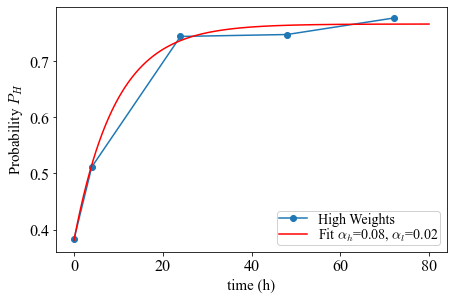

In [23]:
fig= plt.figure(figsize=(7, 4.5))
x=np.linspace(0,80,1001)
plt.plot(times,weightVals[0,:,1],'o-',label='High Weights')
plt.plot(x, fitFunc(x, *popt), 'r-',
         label=r'Fit $\alpha_h$='+f'{mah:.2f}'+r', $\alpha_l$='+f'{mal:.2f}')
plt.legend(fontsize=14, framealpha=0.9, borderpad=0.1, labelspacing=0.0, loc='lower right');
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('time (h)', fontsize=15)
plt.ylabel(r'Probability $P_H$', fontsize=15)
fig.savefig("PhTrans.eps", bbox_inches="tight")

In [24]:
print(mah, mal)

0.0820673169193884 0.024996394396885474


In [25]:
cond=0
timeP=2
# if gm.means_[1].item()>gm.means_[0].item():
#     li=0
#     hi=1
# else:
#     li=1
#     hi=0

D=1
C1l=meanVals[cond,timeP,0]
C3l=meanVals[cond,timeP,1]

K1l=1.0/(stdVals[cond,timeP,0]**2)
K3l=1.0/(stdVals[cond,timeP,1]**2)
#ratio=mal/mah 
ratio=weightVals[cond,timeP,0]/weightVals[cond,timeP,1] #ratio of low to high

rl=(K1l/C1l+K3l/C3l)/(C3l-C1l)**2 #this is actually r/D
C2l=((K3l/K1l)*C1l**2+C3l**2)/((K3l/K1l)*C1l+C3l) # independent of D

D=(Upot(x=C3l,r=rl,C1=C1l,C2=C2l,C3=C3l)-Upot(x=C1l,r=rl,C1=C1l,C2=C2l,C3=C3l))/np.log(ratio*np.sqrt(K1l/K3l))

rl=rl/D
D=(Upot(x=C3l,r=rl,C1=C1l,C2=C2l,C3=C3l)-Upot(x=C1l,r=rl,C1=C1l,C2=C2l,C3=C3l))/np.log(ratio*np.sqrt(K1l/K3l))


K2l=rl*C2l*(C2l-C1l)*(C3l-C2l)

Dtemp=mal/((np.sqrt(K3l*K2l)/(2*np.pi))*np.exp(-(Upot(x=C2l,r=rl,C1=C1l,C2=C2l,C3=C3l)-Upot(x=C3l,r=rl,C1=C1l,C2=C2l,C3=C3l))/1))

print(rl,C1l,C2l,C3l,D)



#D=1

#if k2l is 1
pah=Dtemp*(np.sqrt(K1l*K2l)/(2*np.pi))*np.exp(-(Upot(x=C2l,r=rl,C1=C1l,C2=C2l,C3=C3l)-Upot(x=C1l,r=rl,C1=C1l,C2=C2l,C3=C3l))/1)
pal=Dtemp*(np.sqrt(K3l*K2l)/(2*np.pi))*np.exp(-(Upot(x=C2l,r=rl,C1=C1l,C2=C2l,C3=C3l)-Upot(x=C3l,r=rl,C1=C1l,C2=C2l,C3=C3l))/1)

print('C1: ', C1l)
print('C2: ', C2l)
print('C3: ', C3l)
print('K1: ', K1l)
print('K2: ', K2l)
print('K3: ', K3l)
print('r: ', rl)
print('D: ', D)
print('ratio: ', ratio)

print('ah: ', pah)
print('al: ', pal)


0.1059187562347224 2.38756873 4.4887851522797995 4.52985282 1.0000000000000262
C1:  2.38756873
C2:  4.4887851522797995
C3:  4.52985282
K1:  38.03830085299849
K2:  0.041027260357607884
K3:  1.4105178007246089
r:  0.1059187562347224
D:  1.0000000000000262
ratio:  0.34342261630479787
ah:  0.07278610438020787
al:  0.024996394396885474


In [26]:
pal/pah

0.3434226163048031

In [27]:
Dtemp

0.6528851235376844

In [28]:
mal/mah

0.30458403339100854

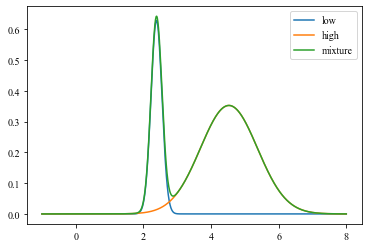

In [29]:
x=np.linspace(-1,8,1001)

plt.plot(x,weightVals[cond,timeP,0]*np.exp(-(x-meanVals[cond,timeP,0])**2/(2*stdVals[cond,timeP,0]**2))/np.sqrt(2*np.pi*stdVals[cond,timeP,0]**2), label='low')
plt.plot(x,weightVals[cond,timeP,1]*np.exp(-(x-meanVals[cond,timeP,1])**2/(2*stdVals[cond,timeP,1]**2))/np.sqrt(2*np.pi*stdVals[cond,timeP,1]**2), label='high')
plt.plot(x,MixtureM(x,weightVals[cond,timeP,0],weightVals[cond,timeP,1],meanVals[cond,timeP,0],meanVals[cond,timeP,1],stdVals[cond,timeP,0],stdVals[cond,timeP,1]), label='mixture')
    
#y=weightVals[cond,timeP,0]*np.exp(-(x-meanVals[cond,timeP,0])**2/(2*stdVals[cond,timeP,0]**2))/np.sqrt(2*np.pi*stdVals[cond,timeP,0]**2)+weightVals[cond,timeP,1]*np.exp(-(x-meanVals[cond,timeP,1])**2/(2*stdVals[cond,timeP,1]**2))/np.sqrt(2*np.pi*stdVals[cond,timeP,1]**2)
#plt.plot(x,y,label='mixture')
plt.legend()
#plt.plot(x.reshape(-1,1),gm.predict_proba(x.reshape(-1,1)),'b-',label='probability')

Text(0.5, 0, '$\\phi$')

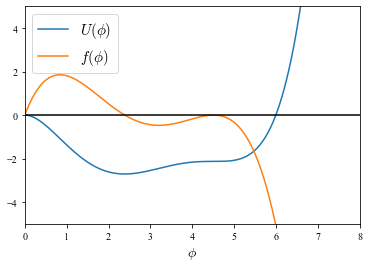

In [30]:
plt.plot(x,Upot(x,r=rl,C1=C1l,C2=C2l,C3=C3l),label=r'$U(\phi)$')
plt.plot(x,func(x,r=rl,C1=C1l,C2=C2l,C3=C3l),label=r'$f(\phi)$')
plt.legend(fontsize=15)
plt.axhline(y=0,color='k')
plt.ylim([-5,5])
plt.xlim([0,8])
plt.xlabel(r'$\phi$',fontsize=14)

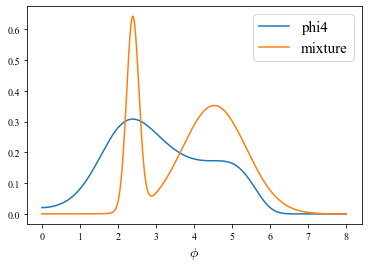

In [31]:
x=np.linspace(0,8,1001)
#plt.hist(points[points>0],100, density=True)

#D=4

def integrandF(x,r=rl,C1=C1l,C2=C2l,C3=C3l,D=D):
    return np.exp(-Upot(x,r=r,C1=C1,C2=C2,C3=C3)/D)


invnorm=integrate.quad(integrandF, 0, 40, args=(rl,C1l,C2l,C3l,D))
norm=1.0/invnorm[0]
plt.plot(x,norm*np.exp(-Upot(x,r=rl,C1=C1l,C2=C2l,C3=C3l)/D),label='phi4')
plt.plot(x,MixtureM(x,weightVals[cond,timeP,0],weightVals[cond,timeP,1],meanVals[cond,timeP,0],meanVals[cond,timeP,1],stdVals[cond,timeP,0],stdVals[cond,timeP,1]), label='mixture')
plt.xlabel(r'$\phi$',fontsize=14)
plt.legend(fontsize=15)

In [32]:
#def Upot(x,r=.1,C1=1,C2=2,C3=3):
#    return -(r/2.0)*C1*C2*C3*x**2+(r/3.0)*(C1*C2+C1*C3+C2*C3)*x**3-(r/4.0)*(C1+C2+C3)*x**4+(r/5.0)*x**5

def UpotSimp(x,r,C2,cons):
    return Upot(x,r=r,C1=C1l,C2=C2,C3=C3l)+cons

In [33]:
print(C1l, C3l, C2l, rl)

2.38756873 4.52985282 4.4887851522797995 0.1059187562347224


In [34]:
mmModel=-np.log(MixtureM(x,weightVals[cond,timeP,0],weightVals[cond,timeP,1],meanVals[cond,timeP,0],meanVals[cond,timeP,1],stdVals[cond,timeP,0],stdVals[cond,timeP,1]))
mask1=np.arange(150,270,1)
mask2=np.arange(400,550,1)
mask=np.concatenate((mask1,mask2))
paramopt, paramcov = curve_fit(UpotSimp, x[mask], mmModel[mask])

In [35]:
paramopt

array([ 1.4966753,  3.1522274, 25.9158215])

In [36]:
def funcForce(x,a0=0,a1=1,a2=1,a3=1,a4=1,a5=1):
    return -(a0+a1+2*a2*x+3*a3*x**2+4*a4*x**3+5*a5*a5*x**4)

(-10.0, 40.0)

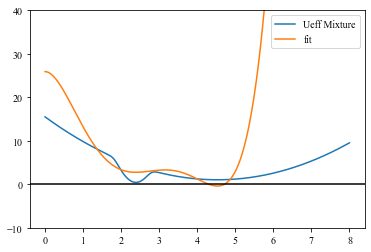

In [37]:
#paramopt, paramcov = curve_fit(UpotSimp, x[mask], mmModel[mask])
#plt.plot(x,Upot(x,r=rl,C1=C1l,C2=C2l,C3=C3l),label=r'$U(\phi)$')
mmModel=-np.log(MixtureM(x,weightVals[cond,timeP,0],weightVals[cond,timeP,1],meanVals[cond,timeP,0],meanVals[cond,timeP,1],stdVals[cond,timeP,0],stdVals[cond,timeP,1]))
plt.plot(x,mmModel,label='Ueff Mixture')
plt.plot(x,UpotSimp(x,*paramopt),label='fit')
#plt.plot(x, funcForce(x,*paramopt),label='force')
#plt.plot(x,(x-meanVals[cond,timeP,0])**2/(2.0*stdVals[cond,timeP,0]**2),label='C1')
#eps=(weightVals[cond,timeP,1]*stdVals[cond,timeP,0])/(weightVals[cond,timeP,0]*stdVals[cond,timeP,1])*np.exp(-(x-meanVals[cond,timeP,1])**2/(2.0*stdVals[cond,timeP,1]**2)+(x-meanVals[cond,timeP,0])**2/(2.0*stdVals[cond,timeP,0]**2))
plt.axhline(y=0,color='k')
#eps=0
#plt.plot(x,(x-meanVals[cond,timeP,0])**2/(2.0*stdVals[cond,timeP,0]**2)-eps,label='mod')

#plt.plot(x,(x-meanVals[cond,timeP,1])**2/(2.0*stdVals[cond,timeP,1]**2),label='C3')
#plt.plot(x,(x-meanVals[cond,timeP,0])**2/(2.0*stdVals[cond,timeP,0]**2)+)
plt.legend()
plt.ylim([-10,40])

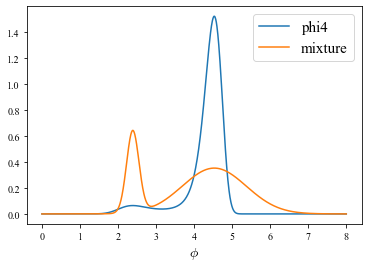

In [38]:
x=np.linspace(0,8,1001)
#plt.hist(points[points>0],100, density=True)

#D=4

def integrandU(x,r=rl,C1=C1l,C2=C2l,C3=C3l,D=D):
    return np.exp(-Upot(x,r=r,C1=C1,C2=C2,C3=C3)/D)


invnorm2=integrate.quad(integrandU, 0, 40, args=(paramopt[0],C1l,paramopt[1],C3l,1))
norm2=1.0/invnorm2[0]
plt.plot(x,norm2*np.exp(-Upot(x,r=paramopt[0],C1=C1l,C2=paramopt[1],C3=C3l)/1),label='phi4')
plt.plot(x,MixtureM(x,weightVals[cond,timeP,0],weightVals[cond,timeP,1],meanVals[cond,timeP,0],meanVals[cond,timeP,1],stdVals[cond,timeP,0],stdVals[cond,timeP,1]), label='mixture')
plt.xlabel(r'$\phi$',fontsize=14)
plt.legend(fontsize=15)

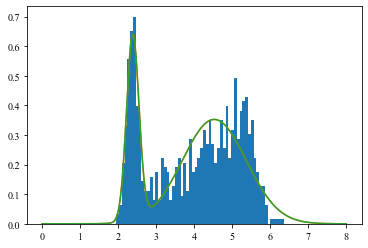

In [39]:

#log cfu to log gfp mapping
def lctolg(x,a,b,c):
    return a*np.tanh((x-b)/c)

#lof gfp to log cfu mapping
def lgtolc(x,a,b,c):
    return (c/2)*np.log((1+x/a)/(1-x/a))+b

parami=np.array([4.00229685, 0.8844725, 3.064446])

#Load the Data file used for fits

lowFile=pd.read_csv('../Data/LowInhT24.csv')


green=lowFile[1:,6]
logG=np.log10(green)
logGreen=lgtolc(logG,*parami)

tn,tbins,tpatches=plt.hist(logGreen,60, density=True,label='log(GFP) Data')
gm=mixture.GaussianMixture(n_components=2,covariance_type='full', n_init=10, max_iter=1000, init_params='kmeans');
gm.fit(logGreen.reshape(-1,1));
plt.plot(x,MixtureM(x,gm.weights_[0].item(),gm.weights_[1].item(),gm.means_[0].item(),gm.means_[1].item(),np.sqrt(gm.covariances_[0].item()),np.sqrt(gm.covariances_[1].item())),label='fit sim') 
y=MixtureM(x,weightVals[cond,timeP,0],weightVals[cond,timeP,1],meanVals[cond,timeP,0],meanVals[cond,timeP,1],stdVals[cond,timeP,0],stdVals[cond,timeP,1])
plt.plot(x,y, label='mixture')


In [53]:
tn

array([0.03180296, 0.06360592, 0.20671924, 0.33393108, 0.5565518 ,
       0.65196067, 0.69966511, 0.397537  , 0.34983256, 0.14311332,
       0.11131036, 0.11131036, 0.1590148 , 0.0795074 , 0.17491628,
       0.0795074 , 0.22262072, 0.19081776, 0.17491628, 0.0795074 ,
       0.12721184, 0.19081776, 0.22262072, 0.09540888, 0.20671924,
       0.11131036, 0.28622664, 0.17491628, 0.19081776, 0.22262072,
       0.25442368, 0.3180296 , 0.27032516, 0.34983256, 0.27032516,
       0.20671924, 0.25442368, 0.34983256, 0.25442368, 0.397537  ,
       0.22262072, 0.3180296 , 0.49294588, 0.28622664, 0.38163552,
       0.41343848, 0.42933996, 0.30212812, 0.34983256, 0.22262072,
       0.17491628, 0.12721184, 0.12721184, 0.06360592, 0.        ,
       0.01590148, 0.01590148, 0.01590148, 0.01590148, 0.01590148])

C:\Users\howli\AppData\Local\Temp/ipykernel_15580/1570962675.py:7: RuntimeWarning: invalid value encountered in true_divide
  stdlnP=np.sqrt((stdP/Prob)**2)


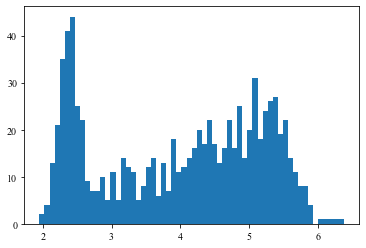

In [97]:
gtn,gtbins,gtpatches=plt.hist(logGreen,60, density=False,label='log(CFU) Data')
tt=(gtbins[0:-1]+gtbins[1:])/2
Num=np.sum(gtn)
width=(gtbins[1]-gtbins[0])
Prob=gtn/Num/width
stdP=np.sqrt(gtn)/Num/width
stdlnP=np.sqrt((stdP/Prob)**2)

In [92]:
np.abs(Prob-tn)<1e-14

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [94]:
gtbins[1:]-gtbins[0:-1]

array([0.07372477, 0.07372477, 0.07372477, 0.07372477, 0.07372477,
       0.07372477, 0.07372477, 0.07372477, 0.07372477, 0.07372477,
       0.07372477, 0.07372477, 0.07372477, 0.07372477, 0.07372477,
       0.07372477, 0.07372477, 0.07372477, 0.07372477, 0.07372477,
       0.07372477, 0.07372477, 0.07372477, 0.07372477, 0.07372477,
       0.07372477, 0.07372477, 0.07372477, 0.07372477, 0.07372477,
       0.07372477, 0.07372477, 0.07372477, 0.07372477, 0.07372477,
       0.07372477, 0.07372477, 0.07372477, 0.07372477, 0.07372477,
       0.07372477, 0.07372477, 0.07372477, 0.07372477, 0.07372477,
       0.07372477, 0.07372477, 0.07372477, 0.07372477, 0.07372477,
       0.07372477, 0.07372477, 0.07372477, 0.07372477, 0.07372477,
       0.07372477, 0.07372477, 0.07372477, 0.07372477, 0.07372477])

<ErrorbarContainer object of 3 artists>

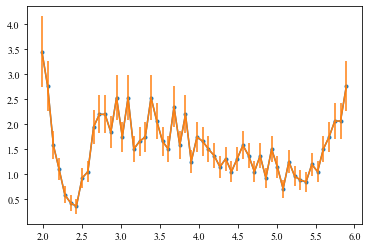

In [73]:
plt.plot(tt[:54],-np.log(tn[:54]),'.-')
plt.errorbar(tt[:54],-np.log(tn[:54]),yerr=stdlnP[:54])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


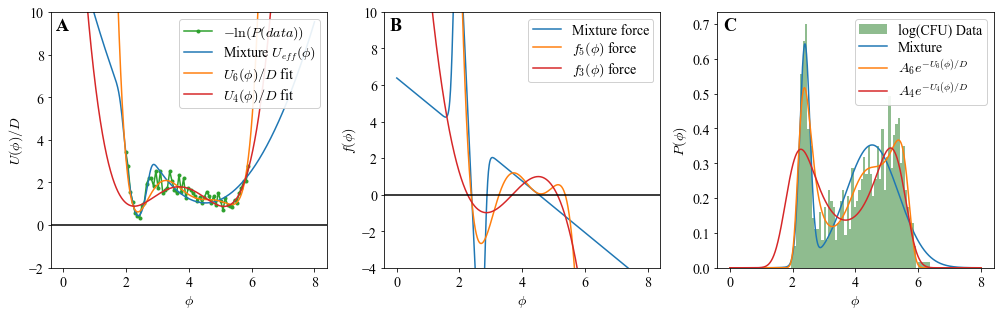

In [98]:
fig, ax = plt.subplots(1,3,figsize=(14, 4.5), sharex=False, sharey=False)
paramopt4, paramcov4 = curve_fit(Upot4, tt[:54], -np.log(Prob[:54]),sigma=stdlnP[:54], absolute_sigma=True)
paramopt3, paramcov3 = curve_fit(Upot3, tt[:54], -np.log(Prob[:54]),sigma=stdlnP[:54], absolute_sigma=True)
#plt.plot(x,Upot(x,r=rl,C1=C1l,C2=C2l,C3=C3l),label=r'$U(\phi)$')
mmModel=-np.log(MixtureM(x,weightVals[cond,timeP,0],weightVals[cond,timeP,1],meanVals[cond,timeP,0],meanVals[cond,timeP,1],stdVals[cond,timeP,0],stdVals[cond,timeP,1]))
ax[0].plot(tt[:54],-np.log(tn[:54]),'.-',label=r'$-\ln(P(data))$',color='C2')
ax[0].plot(x,mmModel,label=r'Mixture $U_{eff}(\phi)$',color='C0')
ax[0].plot(x,Upot4(x,*paramopt4),label=r'$U_{6}(\phi)/D$ fit',color='C1')
ax[0].plot(x,Upot3(x,*paramopt3),label=r'$U_{4}(\phi)/D$ fit',color='C3')
ax[0].axhline(y=0,color='k')
ax[0].set_xlabel(r'$\phi$',fontsize=14)
ax[0].set_ylabel(r'$U(\phi)/D$',fontsize=14)
ax[0].legend(fontsize=14, framealpha=0.9, borderpad=0.3, labelspacing=0.2, loc='upper right')
ax[0].set_ylim([-2,10])

ax[1].plot((x[1:]+x[:-1])/2,-(mmModel[1:]-mmModel[:-1])/(x[1]-x[0]),label=r'Mixture force',color='C0')
ax[1].plot(x,force4(x,*paramopt4),label=r'$f_{5}(\phi)$ force',color='C1')
ax[1].plot(x,force3(x,*paramopt3),label=r'$f_{3}(\phi)$ force',color='C3')
ax[1].axhline(y=0,color='k')
ax[1].set_xlabel(r'$\phi$',fontsize=14)
ax[1].set_ylabel(r'$f(\phi)$',fontsize=14)
ax[1].legend(fontsize=14, framealpha=0.9, borderpad=0.3, labelspacing=0.2, loc='upper right')
ax[1].set_ylim([-4,10])

def integrand4(x,paramst):
    return np.exp(-Upot4(x,*paramst))

invnorm4=integrate.quad(integrand4, 0, 40, args=paramopt4)
norm4=1.0/invnorm4[0]

def integrand3(x,paramst):
    return np.exp(-Upot3(x,*paramst))

invnorm3=integrate.quad(integrand3, 0, 40, args=paramopt3)
norm3=1.0/invnorm3[0]


ax[2].hist(logGreen,60, density=True,label='log(CFU) Data', color='darkseagreen')
gm=mixture.GaussianMixture(n_components=2,covariance_type='full', n_init=10, max_iter=1000, init_params='kmeans');
gm.fit(logGreen.reshape(-1,1));
ax[2].plot(x,MixtureM(x,gm.weights_[0].item(),gm.weights_[1].item(),gm.means_[0].item(),gm.means_[1].item(),np.sqrt(gm.covariances_[0].item()),np.sqrt(gm.covariances_[1].item())),label='Mixture',color='C0') 
#y=MixtureM(x,weightVals[cond,timeP,0],weightVals[cond,timeP,1],meanVals[cond,timeP,0],meanVals[cond,timeP,1],stdVals[cond,timeP,0],stdVals[cond,timeP,1])
#ax[2].plot(x,y, label='mixture')
ax[2].plot(x,norm4*np.exp(-Upot4(x,*paramopt4)),label=r'$A_6e^{-U_6(\phi)/D}$',color='C1')
ax[2].plot(x,norm3*np.exp(-Upot3(x,*paramopt3)),label=r'$A_4e^{-U_4(\phi)/D}$',color='C3')
ax[2].legend(fontsize=14, framealpha=0.9, borderpad=0.3, labelspacing=0.2, loc='upper right')
ax[2].set_xlabel(r'$\phi$',fontsize=14)
ax[2].set_ylabel(r'$P_{ }(\phi)$',fontsize=14)



ax[0].text(0.02,.93,'A',fontsize=18,weight='bold',transform=ax[0].transAxes)
ax[1].text(0.02,.93,'B',fontsize=18,weight='bold',transform=ax[1].transAxes)
ax[2].text(0.02,.93,'C',fontsize=18,weight='bold',transform=ax[2].transAxes)


ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

fig.savefig("Ueff.eps", bbox_inches="tight")

In [180]:
zz = lambda xt: force4(xt,*paramopt4)
roots=fsolve(zz, np.array([2,3,4,6]))
print(roots)
D3eff=(mal*2*np.pi/np.sqrt(np.abs(R4(roots[1],*paramopt3)*R4(roots[2],*paramopt4))))*np.exp(Upot4(roots[1],*paramopt4)-Upot4(roots[2],*paramopt4))
print(D3eff)

[2.37381136 3.26392193 4.59853372 5.36907839]
0.08213525483623277


In [181]:
norm4

0.9618032381761943

In [182]:
paramopt4

array([ 7.95765559e+02, -1.32207620e+03,  8.91446605e+02, -3.12488050e+02,
        6.02326815e+01, -6.06920137e+00,  2.50330068e-01])

In [183]:
np.log(norm4)

-0.03894538335676653

In [184]:
cond2=0
timeInd=[0,2400,4800]
initState=0


numSims=1000
timepoints=10000
dt=.01
fac=np.sqrt(D3eff*dt)
storeSim=np.zeros((numSims,timepoints))
for s in range(numSims):
    storeSim[s,0]=MMmeanVals[cond2,0,initState]+MMstdVals[cond2,0,initState]*np.random.randn()   #C3l
    for i in range(timepoints-1):
        storeSim[s,i+1]=np.max([storeSim[s,i]+dt*D3eff*force4(storeSim[s,i],*paramopt4)+fac*np.random.randn(),0])

Text(0, 0.5, '$\\phi$')

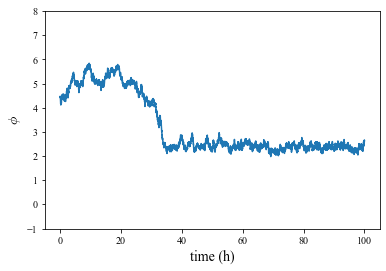

In [235]:
plt.plot(np.arange(timepoints)*dt,storeSim[15,:].T)
plt.ylim(-1,8)
plt.xlabel('time (h)',fontsize=14)
plt.ylabel(r'$\phi$',fontsize=14)

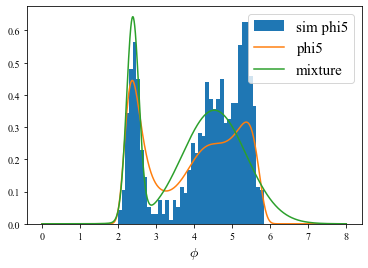

In [186]:
plt.hist(storeSim[:,9000],40, density=True,label='sim phi5')
plt.plot(x,norm3*np.exp(-Upot4(x,*paramopt4)),label='phi5')
#plt.plot(x,np.exp(-Upot4(x,*paramopt4)),label='unphi4')

plt.plot(x,MixtureM(x,weightVals[cond,timeP,0],weightVals[cond,timeP,1],meanVals[cond,timeP,0],meanVals[cond,timeP,1],stdVals[cond,timeP,0],stdVals[cond,timeP,1]), label='mixture')
plt.xlabel(r'$\phi$',fontsize=14)
plt.legend(fontsize=15)

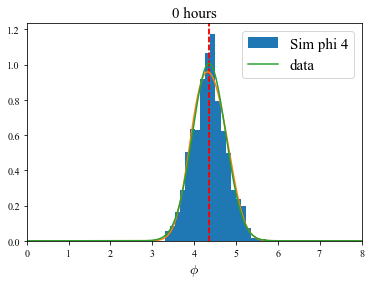

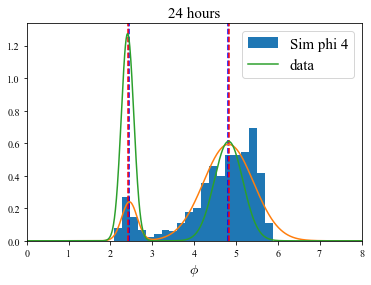

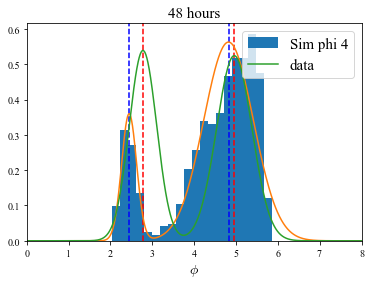

In [187]:
timeInd=[0,2400,4800]
for i in range(3):
    timeP2=i
    plt.figure();
    plt.hist(storeSim[:,timeInd[i]],20, density=True, label='Sim phi 4');
    gm=mixture.GaussianMixture(n_components=2,covariance_type='full', n_init=10, max_iter=1000, init_params='kmeans');
    gm.fit(storeSim[:,timeInd[i]].reshape(-1,1));
    #textstr=f'means:{gm.means_.T} std:{np.sqrt(gm.covariances_.T)} weights:{gm.weights_}'
    if(i>0):
        plt.axvline(x = gm.means_[0], color = 'b', linestyle='dashed')
        plt.axvline(x = gm.means_[1], color = 'b', linestyle='dashed')
    
    plt.axvline(x = MMmeanVals[cond2,timeP2,0], color = 'r', linestyle='dashed')
    plt.axvline(x = MMmeanVals[cond2,timeP2,1], color = 'r', linestyle='dashed')
    
    plt.plot(x,MixtureM(x,gm.weights_[0].item(),gm.weights_[1].item(),gm.means_[0].item(),gm.means_[1].item(),np.sqrt(gm.covariances_[0].item()),np.sqrt(gm.covariances_[1].item())))
    plt.plot(x,MixtureM(x,MMweightVals[cond2,timeP2,0],MMweightVals[cond2,timeP2,1],MMmeanVals[cond2,timeP2,0],MMmeanVals[cond2,timeP2,1],MMstdVals[cond2,timeP2,0],MMstdVals[cond2,timeP2,1]),label='data')
    plt.xlabel(r'$\phi$',fontsize=14)
    plt.legend(fontsize=15)
    plt.title(f'{MMtimes[i]} hours', fontsize=15)
    
    #plt.text(0, 0, textstr, fontsize=14)
    plt.xlim([0,8])

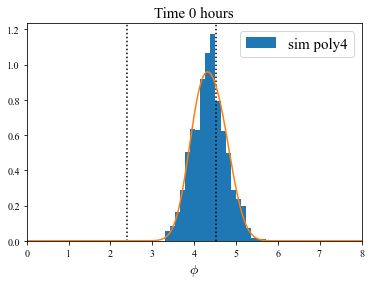

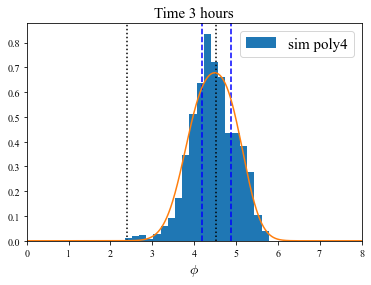

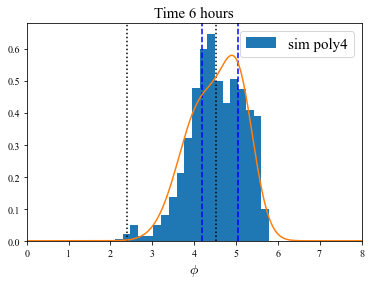

In [188]:
# for i in range(5):
#     plt.figure();
#     plt.hist(storeSim[:,i*10],20, density=True, label='sim');
#     plt.xlim([0,8])

for i in range(3):
    timeP2=i
    plt.figure();
    plt.hist(storeSim[:,i*300],20, density=True, label='sim poly4');
    gm=mixture.GaussianMixture(n_components=2,covariance_type='full', n_init=10, max_iter=1000, init_params='kmeans');
    gm.fit(storeSim[:,i*300].reshape(-1,1));
    
    if(i>0):
        plt.axvline(x = gm.means_[0], color = 'b', linestyle='dashed')
        plt.axvline(x = gm.means_[1], color = 'b', linestyle='dashed')
        
    plt.axvline(x = C1l, color = 'k', linestyle='dotted')
    plt.axvline(x = C3l, color = 'k', linestyle='dotted')
    #textstr=f'means:{gm.means_.T} std:{np.sqrt(gm.covariances_.T)} weights:{gm.weights_}'
    #plt.axvline(x = gm.means_[0], color = 'b', linestyle='dashed')
    #plt.axvline(x = gm.means_[1], color = 'b', linestyle='dashed')
    
    #plt.axvline(x = MMmeanVals[cond2,timeP2,0], color = 'r', linestyle='dashed')
    #plt.axvline(x = MMmeanVals[cond2,timeP2,1], color = 'r', linestyle='dashed')
    
    plt.plot(x,MixtureM(x,gm.weights_[0].item(),gm.weights_[1].item(),gm.means_[0].item(),gm.means_[1].item(),np.sqrt(gm.covariances_[0].item()),np.sqrt(gm.covariances_[1].item())))
    #plt.plot(x,MixtureM(x,MMweightVals[cond2,timeP2,0],MMweightVals[cond2,timeP2,1],MMmeanVals[cond2,timeP2,0],MMmeanVals[cond2,timeP2,1],MMstdVals[cond2,timeP2,0],MMstdVals[cond2,timeP2,1]))
    
    plt.title(f'Time {3*i} hours', fontsize=15)
    plt.legend(fontsize=15)
    plt.xlabel(r'$\phi$',fontsize=14)
    #plt.text(0, 0, textstr, fontsize=14)
    plt.xlim([0,8])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


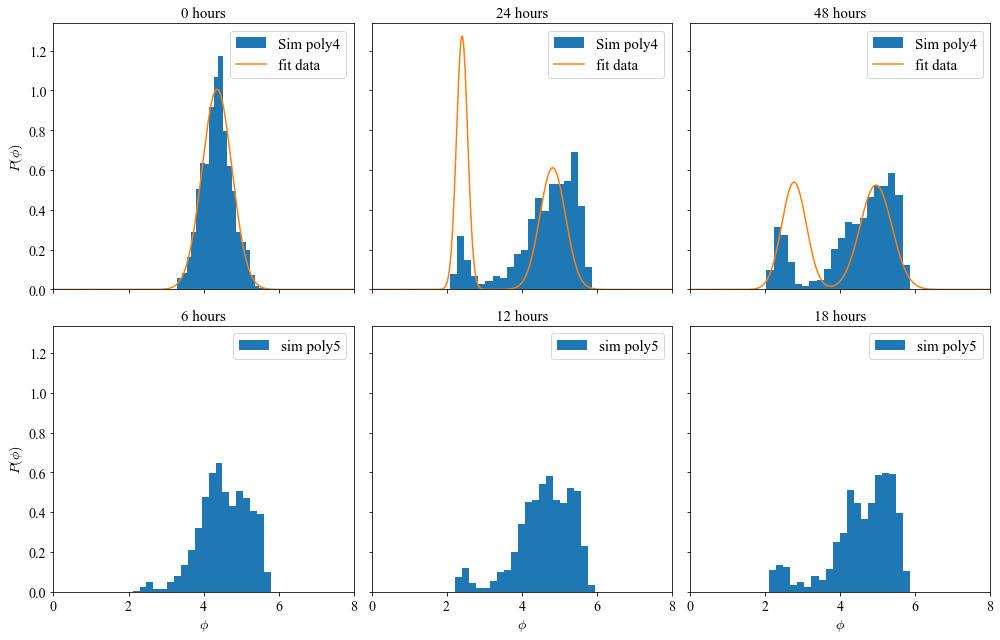

In [200]:
fig, ax = plt.subplots(2,3,figsize=(14, 9), sharex=True, sharey=True)

timeInd=[0,2400,4800]
for i in range(3):
    timeP2=i
    ax[0,i].hist(storeSim[:,timeInd[i]],20, density=True, label='Sim poly4');
    gm=mixture.GaussianMixture(n_components=2,covariance_type='full', n_init=10, max_iter=1000, init_params='kmeans');
    gm.fit(storeSim[:,timeInd[i]].reshape(-1,1));
    #textstr=f'means:{gm.means_.T} std:{np.sqrt(gm.covariances_.T)} weights:{gm.weights_}'
#     if(i>0):
#         ax[0,i].axvline(x = gm.means_[0], color = 'b', linestyle='dashed')
#         ax[0,i].axvline(x = gm.means_[1], color = 'b', linestyle='dashed')
    
#     ax[0,i].axvline(x = MMmeanVals[cond2,timeP2,0], color = 'r', linestyle='dashed')
#     ax[0,i].axvline(x = MMmeanVals[cond2,timeP2,1], color = 'r', linestyle='dashed')
    
    #ax[0,i].plot(x,MixtureM(x,gm.weights_[0].item(),gm.weights_[1].item(),gm.means_[0].item(),gm.means_[1].item(),np.sqrt(gm.covariances_[0].item()),np.sqrt(gm.covariances_[1].item())),label='fit sim')
    ax[0,i].plot(x,MixtureM(x,MMweightVals[cond2,timeP2,0],MMweightVals[cond2,timeP2,1],MMmeanVals[cond2,timeP2,0],MMmeanVals[cond2,timeP2,1],MMstdVals[cond2,timeP2,0],MMstdVals[cond2,timeP2,1]),label='fit data')
    #ax[0,i].set_xlabel(r'$\phi$',fontsize=14)
    ax[0,i].legend(fontsize=15)
    ax[0,i].set_title(f'{MMtimes[i]} hours', fontsize=15)
    
    #plt.text(0, 0, textstr, fontsize=14)
    ax[0,i].set_xlim([0,8])
    
# for i in range(5):
#     plt.figure();
#     plt.hist(storeSim[:,i*10],20, density=True, label='sim');
#     plt.xlim([0,8])

for i in range(3):
    timeP2=i
    ax[1,i].hist(storeSim[:,(i+1)*600],20, density=True, label='sim poly5');
    gm=mixture.GaussianMixture(n_components=2,covariance_type='full', n_init=10, max_iter=1000, init_params='kmeans');
    gm.fit(storeSim[:,(i+1)*600].reshape(-1,1));
    
#     if(i>=0):
#         ax[1,i].axvline(x = gm.means_[0], color = 'b', linestyle='dashed')
#         ax[1,i].axvline(x = gm.means_[1], color = 'b', linestyle='dashed')
        
#     ax[1,i].axvline(x = C1l, color = 'k', linestyle='dotted')
#     ax[1,i].axvline(x = C3l, color = 'k', linestyle='dotted')
#     #textstr=f'means:{gm.means_.T} std:{np.sqrt(gm.covariances_.T)} weights:{gm.weights_}'
    #plt.axvline(x = gm.means_[0], color = 'b', linestyle='dashed')
    #plt.axvline(x = gm.means_[1], color = 'b', linestyle='dashed')
    
    #plt.axvline(x = MMmeanVals[cond2,timeP2,0], color = 'r', linestyle='dashed')
    #plt.axvline(x = MMmeanVals[cond2,timeP2,1], color = 'r', linestyle='dashed')
    
    #ax[1,i].plot(x,MixtureM(x,gm.weights_[0].item(),gm.weights_[1].item(),gm.means_[0].item(),gm.means_[1].item(),np.sqrt(gm.covariances_[0].item()),np.sqrt(gm.covariances_[1].item())),label='fit sim')
    #plt.plot(x,MixtureM(x,MMweightVals[cond2,timeP2,0],MMweightVals[cond2,timeP2,1],MMmeanVals[cond2,timeP2,0],MMmeanVals[cond2,timeP2,1],MMstdVals[cond2,timeP2,0],MMstdVals[cond2,timeP2,1]))
    
    ax[1,i].set_title(f'{6*(i+1)} hours', fontsize=15)
    ax[1,i].legend(fontsize=15)
    ax[1,i].set_xlabel(r'$\phi$',fontsize=14)
    #plt.text(0, 0, textstr, fontsize=14)
    ax[1,i].set_xlim([0,8])
    

ax[0,0].set_ylabel(r'$P(\phi)$',fontsize=14)
ax[1,0].set_ylabel(r'$P(\phi)$',fontsize=14)

ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[0,2].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,2].tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

fig.savefig("Poly4TimeSims.eps", bbox_inches="tight")



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


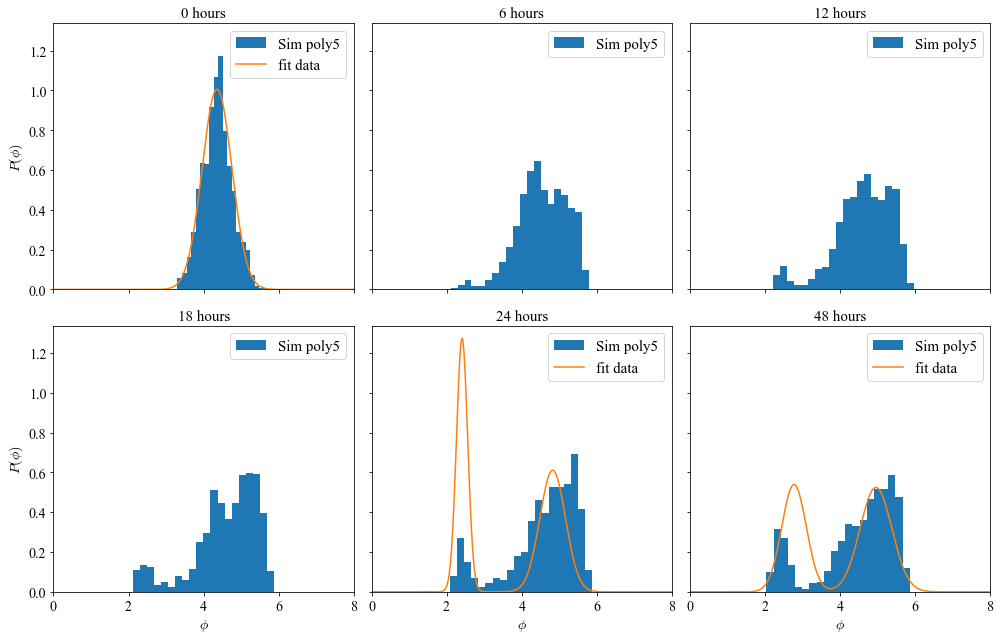

In [201]:
fig, axs = plt.subplots(2,3,figsize=(14, 9), sharex=True, sharey=True)

timeInd=[0,600,1200,1800,2400,4800]
for i, ax in enumerate(axs.flatten()):
    ax.hist(storeSim[:,timeInd[i]],20, density=True, label='Sim poly5');
    ax.set_title(f'{timeInd[i]//100} hours', fontsize=15)
    
    #plt.text(0, 0, textstr, fontsize=14)
    ax.set_xlim([0,8])    

timeP2=0
axs[0,0].plot(x,MixtureM(x,MMweightVals[cond2,timeP2,0],MMweightVals[cond2,timeP2,1],MMmeanVals[cond2,timeP2,0],MMmeanVals[cond2,timeP2,1],MMstdVals[cond2,timeP2,0],MMstdVals[cond2,timeP2,1]),label='fit data')
timeP2=1
axs[1,1].plot(x,MixtureM(x,MMweightVals[cond2,timeP2,0],MMweightVals[cond2,timeP2,1],MMmeanVals[cond2,timeP2,0],MMmeanVals[cond2,timeP2,1],MMstdVals[cond2,timeP2,0],MMstdVals[cond2,timeP2,1]),label='fit data')
timeP2=2
axs[1,2].plot(x,MixtureM(x,MMweightVals[cond2,timeP2,0],MMweightVals[cond2,timeP2,1],MMmeanVals[cond2,timeP2,0],MMmeanVals[cond2,timeP2,1],MMstdVals[cond2,timeP2,0],MMstdVals[cond2,timeP2,1]),label='fit data')
 
axs[0,0].set_ylabel(r'$P(\phi)$',fontsize=14)
axs[1,0].set_ylabel(r'$P(\phi)$',fontsize=14)
axs[1,0].set_xlabel(r'$\phi$',fontsize=14)
axs[1,1].set_xlabel(r'$\phi$',fontsize=14)
axs[1,2].set_xlabel(r'$\phi$',fontsize=14)


for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(fontsize=15)

fig.tight_layout()

fig.savefig("Poly4TimeSims.eps", bbox_inches="tight")


In [191]:
#already defined above
# C1l=gm.means_[1].item()
# C3l=gm.means_[0].item()
# K1l=1.0/gm.covariances_[1].item()
# K3l=1.0/gm.covariances_[0].item()
# ratio=gm.weights_[1].item()/gm.weights_[0].item()

r1=K1l/C1l
r2=K3l/C3l

D1=1
D2=1

#r1=D1*K1l/C1l
#r2=D2*K3l/C3l

a1=mah #high transition rate l->h
a2=mal # low transition rate h->l

print('r1: ', r1)
print('r2: ', r2)
print('a1: ', a1)
print('a2: ', a2)
print('C1: ', C1l)
print('C3: ', C3l)


#initialize
cond2=0
timeInd=[0,2400,4800]
initState=1

numSims=1000
timepoints=10000
dt=.01
fac1=np.sqrt(D1*dt)
fac2=np.sqrt(D2*dt)
fac=fac1
C=C1l
a=a1
storeSimSwitch=np.zeros((numSims,timepoints))
storeState=np.zeros((numSims,timepoints))
for s in range(numSims):
    storeState[s,0]=initState #np.random.choice([0,1])
    storeSimSwitch[s,0]= MMmeanVals[cond2,0,initState]+MMstdVals[cond2,0,initState]*np.random.randn()  #(C3l-C1l)*storeState[s,0]+C1l
    if storeState[s,0]==0 :
        fac=fac1
        C=C1l
        a=a1
        r=r1
    else:
        fac=fac2
        C=C3l
        a=a2
        r=r2
    for i in range(timepoints-1):
        storeSimSwitch[s,i+1]=np.max([storeSimSwitch[s,i]+dt*switchFunc(storeSimSwitch[s,i],r=r,C=C)+fac*np.random.randn(),0])
        if(np.random.rand()<a*dt):
                if storeState[s,i]==1 :
                    fac=fac1
                    C=C1l
                    a=a1
                    r=r1
                    storeState[s,i+1]=0
                else:
                    fac=fac2
                    C=C3l
                    a=a2
                    r=r2
                    storeState[s,i+1]=1
        else:
            storeState[s,i+1]=storeState[s,i]


r1:  15.931813972533678
r2:  0.3113826997859522
a1:  0.0820673169193884
a2:  0.024996394396885474
C1:  2.38756873
C3:  4.52985282


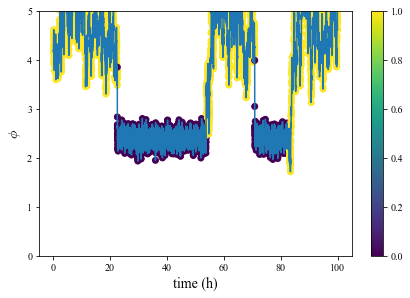

In [192]:
fig= plt.figure(figsize=(7, 4.5))
for i in range(1):
    plt.scatter(np.arange(timepoints)*dt,storeSimSwitch[i,:].T,c=storeState[i,:])
    plt.plot(np.arange(timepoints)*dt,storeSimSwitch[i,:].T)
plt.ylim(0,5)
plt.xlabel('time (h)', fontsize=14)
plt.ylabel(r'$\phi$',fontsize=14)
plt.colorbar()

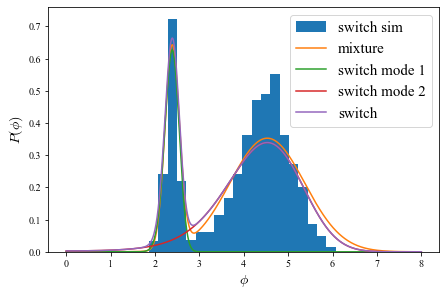

In [193]:
fig= plt.figure(figsize=(7, 4.5))
plt.hist(storeSimSwitch[:,-1],20, density=True, label='switch sim')
y=weightVals[cond,timeP,0]*np.exp(-(x-meanVals[cond,timeP,0])**2/(2*stdVals[cond,timeP,0]**2))/np.sqrt(2*np.pi*stdVals[cond,timeP,0]**2)+weightVals[cond,timeP,1]*np.exp(-(x-meanVals[cond,timeP,1])**2/(2*stdVals[cond,timeP,1]**2))/np.sqrt(2*np.pi*stdVals[cond,timeP,1]**2)
plt.plot(x,y,label='mixture')

def integrand(x,r=r1,C=C1l,D=D1):
    return np.exp(-Uswitch(x,r=r,C=C)/D)

invnorm1=integrate.quad(integrand, 0, 40, args=(r1,C1l,D1))
norm1=1.0/invnorm1[0]
invnorm2=integrate.quad(integrand, 0, 40, args=(r2,C3l,D2))
norm2=1.0/invnorm2[0]

plt.xlabel(r'$\phi$',fontsize=14)
plt.ylabel(r'$P(\phi)$',fontsize=14)
plt.plot(x,norm1*(weightVals[cond,timeP,0]*np.exp(-Uswitch(x,r=r1,C=C1l)/D1)),label='switch mode 1')
plt.plot(x,norm2*(weightVals[cond,timeP,1]*np.exp(-Uswitch(x,r=r2,C=C3l)/D1)),label='switch mode 2')
plt.plot(x,norm1*(weightVals[cond,timeP,0]*np.exp(-Uswitch(x,r=r1,C=C1l)/D1))+norm2*(weightVals[cond,timeP,1]*np.exp(-Uswitch(x,r=r2,C=C3l)/D1)),label='switch')
plt.legend(fontsize=15)

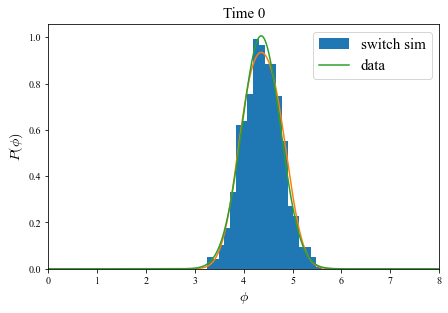

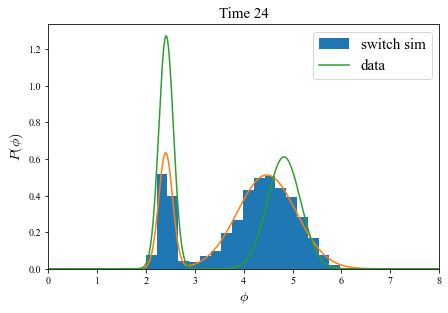

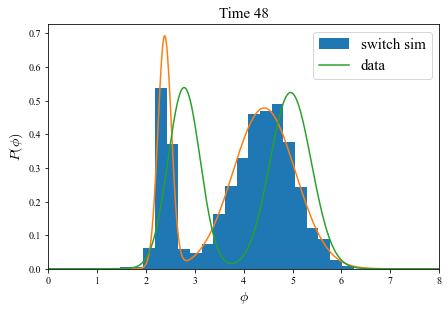

In [195]:
timeInd=[0,2400,4800]

for i in range(3):
    fig= plt.figure(figsize=(7, 4.5));
    timeP2=i
    plt.hist(storeSimSwitch[:,timeInd[i]],20, density=True, label='switch sim');
    gm=mixture.GaussianMixture(n_components=2,covariance_type='full', n_init=10, max_iter=1000, init_params='kmeans');
    gm.fit(storeSimSwitch[:,timeInd[i]].reshape(-1,1));
    #textstr=f'means:{gm.means_.T} std:{np.sqrt(gm.covariances_.T)} weights:{gm.weights_}'
    #plt.axvline(x = gm.means_[0], color = 'b', linestyle='dashed')
    #plt.axvline(x = gm.means_[1], color = 'b', linestyle='dashed')
    
    #plt.axvline(x = MMmeanVals[cond2,timeP2,0], color = 'r', linestyle='dashed')
    #plt.axvline(x = MMmeanVals[cond2,timeP2,1], color = 'r', linestyle='dashed')
    
    plt.plot(x,MixtureM(x,gm.weights_[0].item(),gm.weights_[1].item(),gm.means_[0].item(),gm.means_[1].item(),np.sqrt(gm.covariances_[0].item()),np.sqrt(gm.covariances_[1].item())))
    plt.plot(x,MixtureM(x,MMweightVals[cond2,timeP2,0],MMweightVals[cond2,timeP2,1],MMmeanVals[cond2,timeP2,0],MMmeanVals[cond2,timeP2,1],MMstdVals[cond2,timeP2,0],MMstdVals[cond2,timeP2,1]),label='data')
    plt.xlabel(r'$\phi$',fontsize=14)
    plt.ylabel(r'$P(\phi)$',fontsize=14)
    plt.legend(fontsize=15)
    plt.title(f'Time {MMtimes[i]}', fontsize=15)
    
    #plt.text(0, 0, textstr, fontsize=14)
    plt.xlim([0,8])

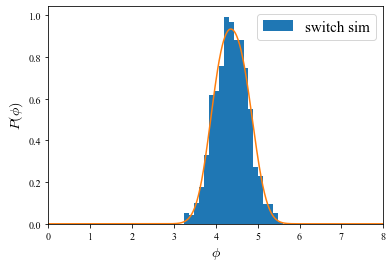

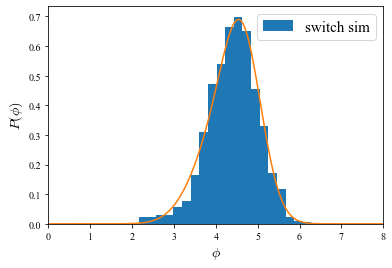

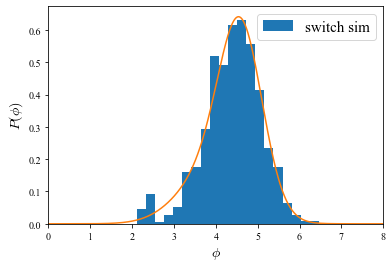

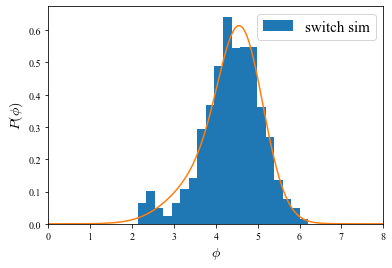

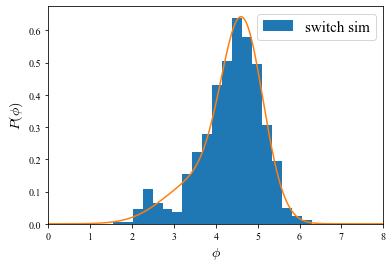

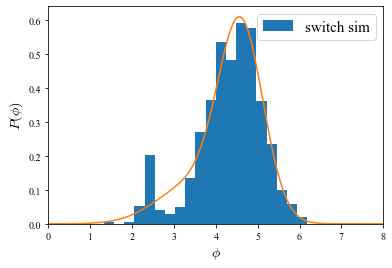

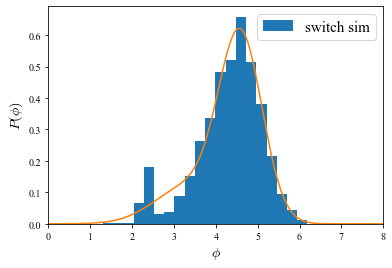

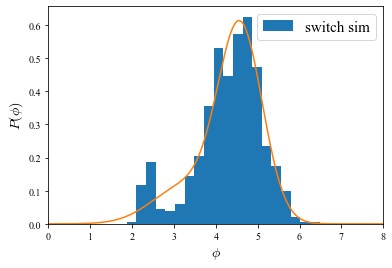

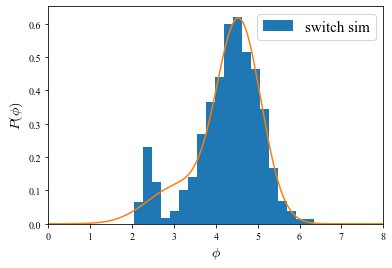

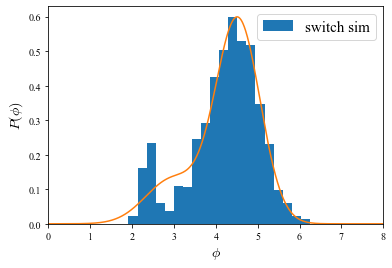

In [196]:
for i in range(10):
    timeP2=i
    plt.figure();
    plt.hist(storeSimSwitch[:,i*50],20, density=True, label='switch sim');
    gm=mixture.GaussianMixture(n_components=2,covariance_type='full', n_init=10, max_iter=1000, init_params='kmeans');
    gm.fit(storeSimSwitch[:,i*50].reshape(-1,1));
    #textstr=f'means:{gm.means_.T} std:{np.sqrt(gm.covariances_.T)} weights:{gm.weights_}'
    #plt.axvline(x = gm.means_[0], color = 'b', linestyle='dashed')
    #plt.axvline(x = gm.means_[1], color = 'b', linestyle='dashed')
    
    #plt.axvline(x = MMmeanVals[cond2,timeP2,0], color = 'r', linestyle='dashed')
    #plt.axvline(x = MMmeanVals[cond2,timeP2,1], color = 'r', linestyle='dashed')
    
    plt.plot(x,MixtureM(x,gm.weights_[0].item(),gm.weights_[1].item(),gm.means_[0].item(),gm.means_[1].item(),np.sqrt(gm.covariances_[0].item()),np.sqrt(gm.covariances_[1].item())))
    #plt.plot(x,MixtureM(x,MMweightVals[cond2,timeP2,0],MMweightVals[cond2,timeP2,1],MMmeanVals[cond2,timeP2,0],MMmeanVals[cond2,timeP2,1],MMstdVals[cond2,timeP2,0],MMstdVals[cond2,timeP2,1]))
    plt.xlabel(r'$\phi$',fontsize=14)
    plt.ylabel(r'$P(\phi)$',fontsize=14)
    plt.legend(fontsize=15)
    
    
    #plt.text(0, 0, textstr, fontsize=14)
    plt.xlim([0,8])

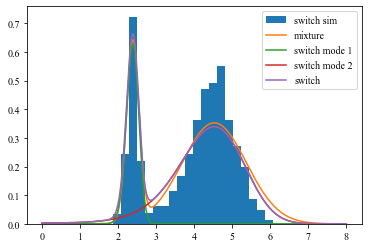

In [197]:
plt.hist(storeSimSwitch[:,-1],20, density=True, label='switch sim')
y=weightVals[cond,timeP,0]*np.exp(-(x-meanVals[cond,timeP,0])**2/(2*stdVals[cond,timeP,0]**2))/np.sqrt(2*np.pi*stdVals[cond,timeP,0]**2)+weightVals[cond,timeP,1]*np.exp(-(x-meanVals[cond,timeP,1])**2/(2*stdVals[cond,timeP,1]**2))/np.sqrt(2*np.pi*stdVals[cond,timeP,1]**2)
plt.plot(x,y,label='mixture')

def integrand(x,r=r1,C=C1l,D=D1):
    return np.exp(-Uswitch(x,r=r,C=C)/D)

invnorm1=integrate.quad(integrand, 0, 40, args=(r1,C1l,D1))
norm1=1.0/invnorm1[0]
invnorm2=integrate.quad(integrand, 0, 40, args=(r2,C3l,D2))
norm2=1.0/invnorm2[0]

plt.plot(x,norm1*(weightVals[cond,timeP,0]*np.exp(-Uswitch(x,r=r1,C=C1l)/D1)),label='switch mode 1')
plt.plot(x,norm2*(weightVals[cond,timeP,1]*np.exp(-Uswitch(x,r=r2,C=C3l)/D1)),label='switch mode 2')
plt.plot(x,norm1*(weightVals[cond,timeP,0]*np.exp(-Uswitch(x,r=r1,C=C1l)/D1))+norm2*(weightVals[cond,timeP,1]*np.exp(-Uswitch(x,r=r2,C=C3l)/D1)),label='switch')
plt.legend()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


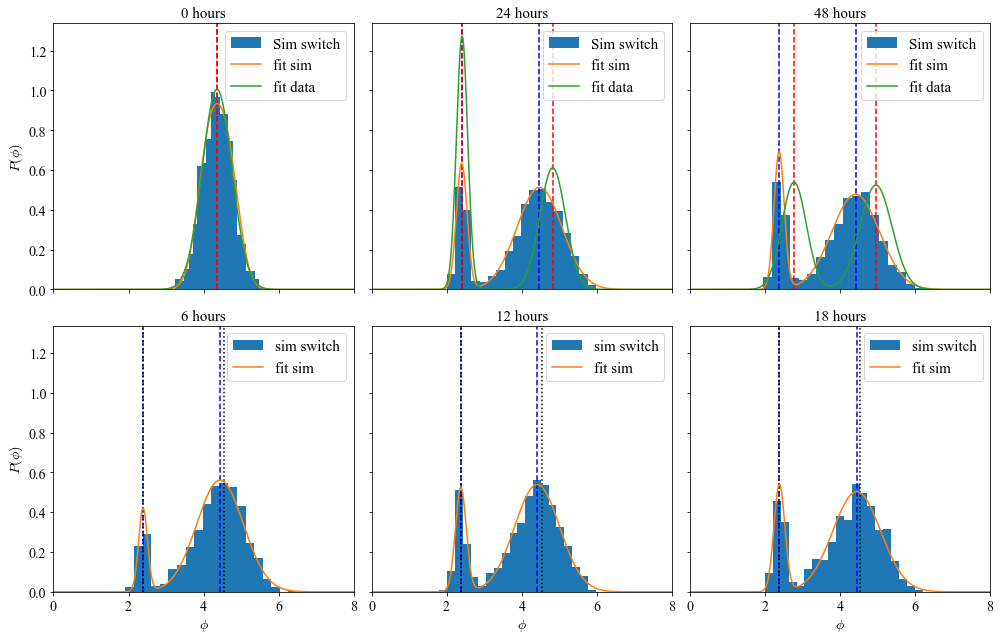

In [198]:
fig, ax = plt.subplots(2,3,figsize=(14, 9), sharex=True, sharey=True)

timeInd=[0,2400,4800]
for i in range(3):
    timeP2=i
    ax[0,i].hist(storeSimSwitch[:,timeInd[i]],20, density=True, label='Sim switch');
    gm=mixture.GaussianMixture(n_components=2,covariance_type='full', n_init=10, max_iter=1000, init_params='kmeans');
    gm.fit(storeSimSwitch[:,timeInd[i]].reshape(-1,1));
    #textstr=f'means:{gm.means_.T} std:{np.sqrt(gm.covariances_.T)} weights:{gm.weights_}'
    if(i>0):
        ax[0,i].axvline(x = gm.means_[0], color = 'b', linestyle='dashed')
        ax[0,i].axvline(x = gm.means_[1], color = 'b', linestyle='dashed')
    
    ax[0,i].axvline(x = MMmeanVals[cond2,timeP2,0], color = 'r', linestyle='dashed')
    ax[0,i].axvline(x = MMmeanVals[cond2,timeP2,1], color = 'r', linestyle='dashed')
    
    ax[0,i].plot(x,MixtureM(x,gm.weights_[0].item(),gm.weights_[1].item(),gm.means_[0].item(),gm.means_[1].item(),np.sqrt(gm.covariances_[0].item()),np.sqrt(gm.covariances_[1].item())),label='fit sim')
    ax[0,i].plot(x,MixtureM(x,MMweightVals[cond2,timeP2,0],MMweightVals[cond2,timeP2,1],MMmeanVals[cond2,timeP2,0],MMmeanVals[cond2,timeP2,1],MMstdVals[cond2,timeP2,0],MMstdVals[cond2,timeP2,1]),label='fit data')
    #ax[0,i].set_xlabel(r'$\phi$',fontsize=14)
    ax[0,i].legend(fontsize=15)
    ax[0,i].set_title(f'{MMtimes[i]} hours', fontsize=15)
    
    #plt.text(0, 0, textstr, fontsize=14)
    ax[0,i].set_xlim([0,8])
    
# for i in range(5):
#     plt.figure();
#     plt.hist(storeSim[:,i*10],20, density=True, label='sim');
#     plt.xlim([0,8])

for i in range(3):
    timeP2=i
    ax[1,i].hist(storeSimSwitch[:,(i+1)*600],20, density=True, label='sim switch');
    gm=mixture.GaussianMixture(n_components=2,covariance_type='full', n_init=10, max_iter=1000, init_params='kmeans');
    gm.fit(storeSimSwitch[:,(i+1)*600].reshape(-1,1));
    
    if(i>=0):
        ax[1,i].axvline(x = gm.means_[0], color = 'b', linestyle='dashed')
        ax[1,i].axvline(x = gm.means_[1], color = 'b', linestyle='dashed')
        
    ax[1,i].axvline(x = C1l, color = 'k', linestyle='dotted')
    ax[1,i].axvline(x = C3l, color = 'k', linestyle='dotted')
    #textstr=f'means:{gm.means_.T} std:{np.sqrt(gm.covariances_.T)} weights:{gm.weights_}'
    #plt.axvline(x = gm.means_[0], color = 'b', linestyle='dashed')
    #plt.axvline(x = gm.means_[1], color = 'b', linestyle='dashed')
    
    #plt.axvline(x = MMmeanVals[cond2,timeP2,0], color = 'r', linestyle='dashed')
    #plt.axvline(x = MMmeanVals[cond2,timeP2,1], color = 'r', linestyle='dashed')
    
    ax[1,i].plot(x,MixtureM(x,gm.weights_[0].item(),gm.weights_[1].item(),gm.means_[0].item(),gm.means_[1].item(),np.sqrt(gm.covariances_[0].item()),np.sqrt(gm.covariances_[1].item())),label='fit sim')
    #plt.plot(x,MixtureM(x,MMweightVals[cond2,timeP2,0],MMweightVals[cond2,timeP2,1],MMmeanVals[cond2,timeP2,0],MMmeanVals[cond2,timeP2,1],MMstdVals[cond2,timeP2,0],MMstdVals[cond2,timeP2,1]))
    
    ax[1,i].set_title(f'{6*(i+1)} hours', fontsize=15)
    ax[1,i].legend(fontsize=15)
    ax[1,i].set_xlabel(r'$\phi$',fontsize=14)
    #plt.text(0, 0, textstr, fontsize=14)
    ax[1,i].set_xlim([0,8])
    

ax[0,0].set_ylabel(r'$P(\phi)$',fontsize=14)
ax[1,0].set_ylabel(r'$P(\phi)$',fontsize=14)

ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[0,2].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,2].tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

fig.savefig("SwitchTimeSims.eps", bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


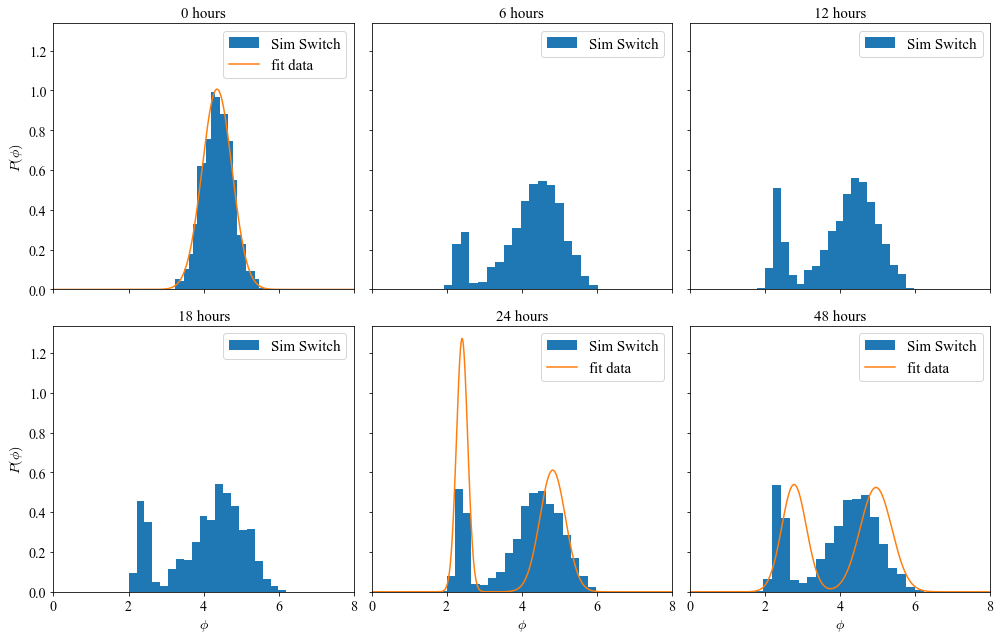

In [199]:
fig, axs = plt.subplots(2,3,figsize=(14, 9), sharex=True, sharey=True)

timeInd=[0,600,1200,1800,2400,4800]
for i, ax in enumerate(axs.flatten()):
    ax.hist(storeSimSwitch[:,timeInd[i]],20, density=True, label='Sim Switch');
    ax.set_title(f'{timeInd[i]//100} hours', fontsize=15)
    
    #plt.text(0, 0, textstr, fontsize=14)
    ax.set_xlim([0,8])    

timeP2=0
axs[0,0].plot(x,MixtureM(x,MMweightVals[cond2,timeP2,0],MMweightVals[cond2,timeP2,1],MMmeanVals[cond2,timeP2,0],MMmeanVals[cond2,timeP2,1],MMstdVals[cond2,timeP2,0],MMstdVals[cond2,timeP2,1]),label='fit data')
timeP2=1
axs[1,1].plot(x,MixtureM(x,MMweightVals[cond2,timeP2,0],MMweightVals[cond2,timeP2,1],MMmeanVals[cond2,timeP2,0],MMmeanVals[cond2,timeP2,1],MMstdVals[cond2,timeP2,0],MMstdVals[cond2,timeP2,1]),label='fit data')
timeP2=2
axs[1,2].plot(x,MixtureM(x,MMweightVals[cond2,timeP2,0],MMweightVals[cond2,timeP2,1],MMmeanVals[cond2,timeP2,0],MMmeanVals[cond2,timeP2,1],MMstdVals[cond2,timeP2,0],MMstdVals[cond2,timeP2,1]),label='fit data')
 
axs[0,0].set_ylabel(r'$P(\phi)$',fontsize=14)
axs[1,0].set_ylabel(r'$P(\phi)$',fontsize=14)
axs[1,0].set_xlabel(r'$\phi$',fontsize=14)
axs[1,1].set_xlabel(r'$\phi$',fontsize=14)
axs[1,2].set_xlabel(r'$\phi$',fontsize=14)


for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(fontsize=15)

fig.tight_layout()

fig.savefig("SwitchTimeSims.eps", bbox_inches="tight")


In [202]:
lowFile=pd.read_csv('../Data/LowInhT24.csv')

In [203]:
#log cfu to log gfp mapping
def lctolg(x,a,b,c):
    return a*np.tanh((x-b)/c)

#lof gfp to log cfu mapping
def lgtolc(x,a,b,c):
    return (c/2)*np.log((1+x/a)/(1-x/a))+b

parami=np.array([4.00229685, 0.8844725, 3.064446])


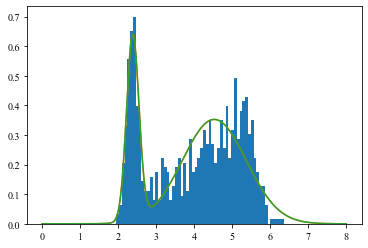

In [204]:

#log cfu to log gfp mapping
def lctolg(x,a,b,c):
    return a*np.tanh((x-b)/c)

#lof gfp to log cfu mapping
def lgtolc(x,a,b,c):
    return (c/2)*np.log((1+x/a)/(1-x/a))+b

parami=np.array([4.00229685, 0.8844725, 3.064446])



lowFile=pd.read_csv('../Data/LowInhT24.csv')
green=lowFile[1:,6]
logG=np.log10(green)
logGreen=lgtolc(logG,*parami)

tn,tbins,tpatches=plt.hist(logGreen,60, density=True,label='log(GFP) Data')
gm=mixture.GaussianMixture(n_components=2,covariance_type='full', n_init=10, max_iter=1000, init_params='kmeans');
gm.fit(logGreen.reshape(-1,1));
plt.plot(x,MixtureM(x,gm.weights_[0].item(),gm.weights_[1].item(),gm.means_[0].item(),gm.means_[1].item(),np.sqrt(gm.covariances_[0].item()),np.sqrt(gm.covariances_[1].item())),label='fit sim') 
y=MixtureM(x,weightVals[cond,timeP,0],weightVals[cond,timeP,1],meanVals[cond,timeP,0],meanVals[cond,timeP,1],stdVals[cond,timeP,0],stdVals[cond,timeP,1])
plt.plot(x,y, label='mixture')


C:\Users\howli\AppData\Local\Temp/ipykernel_15580/3882595873.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(tt,-np.log(tn),'.-')


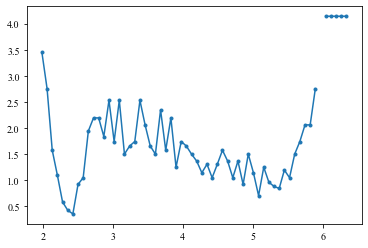

In [205]:
tt=(tbins[0:-1]+tbins[1:])/2
plt.plot(tt,-np.log(tn),'.-')

(-4.0, 10.0)

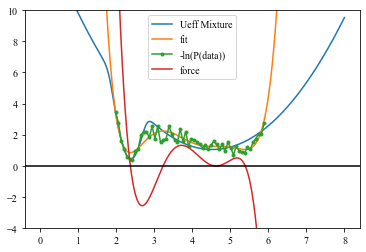

In [206]:
paramopt, paramcov = curve_fit(Upot4, tt[:54], -np.log(tn[:54]))
#plt.plot(x,Upot(x,r=rl,C1=C1l,C2=C2l,C3=C3l),label=r'$U(\phi)$')
mmModel=-np.log(MixtureM(x,weightVals[cond,timeP,0],weightVals[cond,timeP,1],meanVals[cond,timeP,0],meanVals[cond,timeP,1],stdVals[cond,timeP,0],stdVals[cond,timeP,1]))
plt.plot(x,mmModel,label='Ueff Mixture')
plt.plot(x,Upot4(x,*paramopt),label='fit')
plt.plot(tt[:54],-np.log(tn[:54]),'.-',label='-ln(P(data))')

plt.plot(x,force4(x,*paramopt),label='force')
#plt.plot(x,funcForce(x,*paramopt),label='force')
#plt.plot(x, funcForce(x,*paramopt),label='force')
#plt.plot(x,(x-meanVals[cond,timeP,0])**2/(2.0*stdVals[cond,timeP,0]**2),label='C1')
#eps=(weightVals[cond,timeP,1]*stdVals[cond,timeP,0])/(weightVals[cond,timeP,0]*stdVals[cond,timeP,1])*np.exp(-(x-meanVals[cond,timeP,1])**2/(2.0*stdVals[cond,timeP,1]**2)+(x-meanVals[cond,timeP,0])**2/(2.0*stdVals[cond,timeP,0]**2))
plt.axhline(y=0,color='k')
#eps=0
#plt.plot(x,(x-meanVals[cond,timeP,0])**2/(2.0*stdVals[cond,timeP,0]**2)-eps,label='mod')

#plt.plot(x,(x-meanVals[cond,timeP,1])**2/(2.0*stdVals[cond,timeP,1]**2),label='C3')
#plt.plot(x,(x-meanVals[cond,timeP,0])**2/(2.0*stdVals[cond,timeP,0]**2)+)
plt.legend()
plt.ylim([-4,10])

In [207]:
paramopt

array([ 7.84494347e+02, -1.30276670e+03,  8.77974262e+02, -3.07452738e+02,
        5.91658635e+01, -5.94843595e+00,  2.44670003e-01])

C:\Users\howli\AppData\Local\Temp/ipykernel_15580/1876682622.py:7: RuntimeWarning: invalid value encountered in log
  return (c/2)*np.log((1+x/a)/(1-x/a))+b
C:\Users\howli\AppData\Local\Temp/ipykernel_15580/1136042938.py:168: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


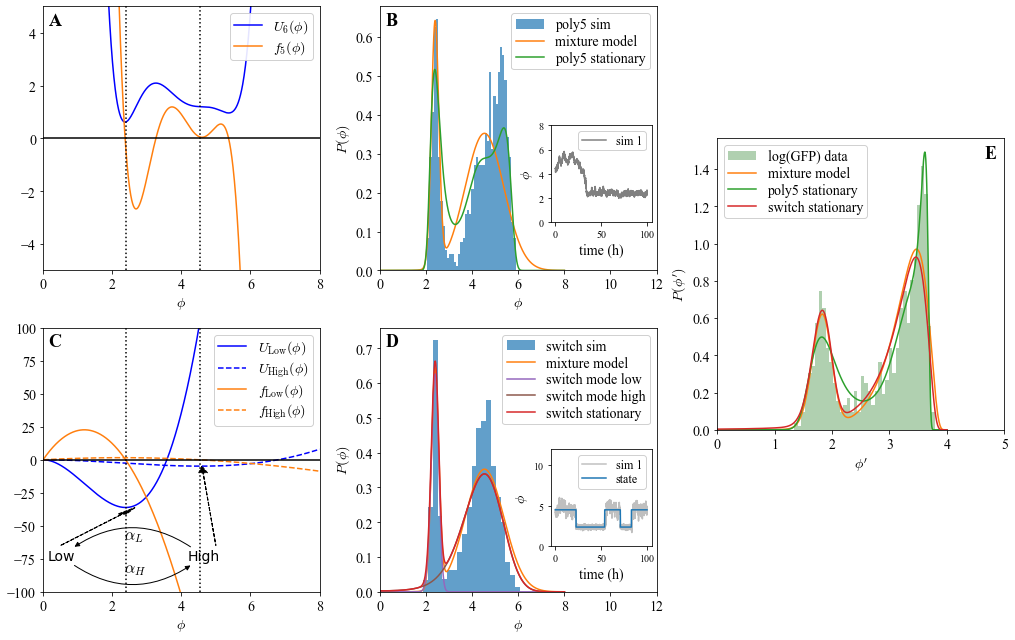

In [265]:
fig, main_ax = plt.subplots(2,3,figsize=(14, 9), sharex=False, sharey=False)

main_ax[0,0].plot(x,Upot4(x,*paramopt4),'b-',label=r'$U_6(\phi)$')
main_ax[0,0].plot(x,force4(x,*paramopt4),color='C1',label=r'$f_5(\phi)$')
#main_ax[0,0].legend(fontsize=15)
main_ax[0,0].axhline(y=0,color='k')
main_ax[0,0].set_ylim([-5,5])
main_ax[0,0].set_xlim([0,8])
main_ax[0,0].set_xlabel(r'$\phi$',fontsize=14)
main_ax[0,0].legend(fontsize=14, framealpha=0.9, borderpad=0.3, labelspacing=0.2, loc='upper right');
main_ax[0,0].axvline(x = C1l, color = 'k', linestyle='dotted')
main_ax[0,0].axvline(x = C3l, color = 'k', linestyle='dotted')

main_ax[0,1].hist(storeSim[:,-1],40, density=True,label='poly5 sim',alpha=.7)
y=MixtureM(x,weightVals[cond,timeP,0],weightVals[cond,timeP,1],meanVals[cond,timeP,0],meanVals[cond,timeP,1],stdVals[cond,timeP,0],stdVals[cond,timeP,1])
main_ax[0,1].plot(x,y, label='mixture model')
main_ax[0,1].plot(x,norm4*np.exp(-Upot4(x,*paramopt4)),label='poly5 stationary')
main_ax[0,1].set_xlabel(r'$\phi$',fontsize=14)
main_ax[0,1].set_ylabel(r'$P_{ }(\phi)$',fontsize=14)

#main_ax[0,1].legend(fontsize=15)
main_ax[0,1].legend(fontsize=14, framealpha=0.9, borderpad=0.3, labelspacing=0.2, loc='upper right');
main_ax[0,1].set_xlim([0,12])

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.55, 0.65, 0.1, 0.15]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(np.arange(timepoints)*dt,storeSim[15,:].T, 'gray', label='sim 1')
#ax2.plot(np.arange(timepoints)*dt,storeSim[15,:].T, label='sim 2')
ax2.set_xlabel('time (h)',fontsize=14)
ax2.set_ylabel(r'$\phi$',fontsize=14)
ax2.set_ylim([0,8])
ax2.legend(fontsize=12, framealpha=0.9, borderpad=0.3, labelspacing=0.2, loc='upper right');



left, bottom, width, height = [0.05, 0.05, 0.17, 0.17]
ax4 = fig.add_axes([left, bottom, width, height])
#ax[0,2].imshow()
import networkx as nx
G = nx.DiGraph()
pos = nx.spring_layout(G)
G.add_nodes_from(['Low', 'High'])
#G.add_edges_from([('High', 'Low'), ('Low', 'High')])
# G.add_edge('High', 'Low', label="aL")
# G.add_edge('Low', 'High', label="aH")

G.add_edge('Low', 'High', label=r"$\alpha_H$")
G.add_edge('High', 'Low', label=r"$\alpha_L$")
labels = nx.get_edge_attributes(G, 'label')
pos = nx.shell_layout(G)
color_map=[]
consty="arc3,rad=0.4"
nx.draw(G, pos, node_color=color_map, with_labels=True, connectionstyle=consty, font_size=14, node_size=1000, node_shape='o', ax=ax4)
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.3, ax=main_ax[0,2])

# nx.draw_networkx_nodes(G, pos, ax=main_ax[0,2],  node_color=color_map, node_size=1000,  node_shape='o')
# nx.draw_networkx_labels(G, pos, font_size=20, ax=main_ax[0,2])
# nx.draw_networkx_edges(
#     G, pos, edge_color="grey", connectionstyle="arc3,rad=0.4", ax=main_ax[0,2]
# )
# nx.draw_networkx_edge_labels(G, pos, labels, label_pos=0.3, font_color="blue", bbox={"alpha": 0}, ax=main_ax[0,2])





main_ax[1,0].plot(x,Uswitch(x,r=r1,C=C1l),'b-',label=r'$U_{\rm Low}(\phi)$')
main_ax[1,0].plot(x,Uswitch(x,r=r2,C=C3l),'b--',label=r'$U_{\rm High}(\phi)$')
main_ax[1,0].plot(x,switchFunc(x,r=r1,C=C1l),color='C1',label=r'$f_{\rm Low}(\phi)$')
main_ax[1,0].plot(x,switchFunc(x,r=r2,C=C3l),linestyle='dashed',color='C1',label=r'$f_{\rm High}(\phi)$')

main_ax[1,0].axvline(x = C1l, color = 'k', linestyle='dotted')
main_ax[1,0].axvline(x = C3l, color = 'k', linestyle='dotted')

#main_ax[0,0].legend(fontsize=15)
main_ax[1,0].axhline(y=0,color='k')
main_ax[1,0].set_ylim([-100,100])
main_ax[1,0].set_xlim([0,8])
main_ax[1,0].set_xlabel(r'$\phi$',fontsize=14)

x1s=C1l
y1s=Uswitch(C1l,r=r1,C=C1l)
x2s=C3l
y2s=Uswitch(C3l,r=r2,C=C3l)

main_ax[1,0].arrow(.5,-65,x1s-.6,y1s+60,head_width=.25,head_length=5, color='k', ls='dashed')
main_ax[1,0].arrow(5,-65,x2s-4.9,y2s+60,head_width=.25,head_length=5, color='k', ls='dashed')

main_ax[1,0].legend(fontsize=14, framealpha=0.9, borderpad=0.3, labelspacing=0.2, loc='upper right');


main_ax[1,1].hist(storeSimSwitch[:,-1],20, density=True, label='switch sim',alpha=.7)
main_ax[1,1].plot(x,y,label='mixture model')

def integrand(x,r=r1,C=C1l,D=D1):
    return np.exp(-Uswitch(x,r=r,C=C)/D)

invnorm1=integrate.quad(integrand, 0, 40, args=(r1,C1l,D1))
norm1=1.0/invnorm1[0]
invnorm2=integrate.quad(integrand, 0, 40, args=(r2,C3l,D2))
norm2=1.0/invnorm2[0]

main_ax[1,1].set_xlabel(r'$\phi$',fontsize=14)
main_ax[1,1].set_ylabel(r'$P_{ }(\phi)$',fontsize=14)
main_ax[1,1].plot(x,norm1*(weightVals[cond,timeP,0]*np.exp(-Uswitch(x,r=r1,C=C1l)/D1)),label='switch mode low',color='C4')
main_ax[1,1].plot(x,norm2*(weightVals[cond,timeP,1]*np.exp(-Uswitch(x,r=r2,C=C3l)/D1)),label='switch mode high',color='C5')
main_ax[1,1].plot(x,norm1*(weightVals[cond,timeP,0]*np.exp(-Uswitch(x,r=r1,C=C1l)/D1))+norm2*(weightVals[cond,timeP,1]*np.exp(-Uswitch(x,r=r2,C=C3l)/D1)),label='switch stationary',color='C3')
main_ax[1,1].set_xlim([0,12])
main_ax[1,1].legend(fontsize=14, framealpha=0.9, borderpad=0.3, labelspacing=0.2, loc='upper right');

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.55, 0.15, 0.1, 0.15]
ax3 = fig.add_axes([left, bottom, width, height])
#ax3.scatter(np.arange(timepoints)*dt,storeSimSwitch[0,:].T,c=storeState[0,:])
hiV=np.mean(storeSimSwitch[0,storeState[0,:].T==1].T)
lowV=np.mean(storeSimSwitch[0,storeState[0,:].T==0].T)
ax3.plot(np.arange(timepoints)*dt,storeSimSwitch[0,:].T, 'gray', alpha=.5, label='sim 1')
ax3.plot(np.arange(timepoints)*dt,lowV+(hiV-lowV)*storeState[0,:].T, label='state')
# ax3.scatter(np.arange(timepoints)*dt,storeSimSwitch[1,:].T,c=storeState[1,:])
# ax3.plot(np.arange(timepoints)*dt,storeSimSwitch[1,:].T, label='sim 2')

ax3.set_xlabel('time (h)',fontsize=14)
ax3.set_ylabel(r'$\phi$',fontsize=14)
ax3.set_ylim([0,12])
ax3.legend(fontsize=12, framealpha=0.9, borderpad=0.3, labelspacing=0.2, loc='upper right');

#gs = main_ax[0, 2].get_gridspec()
#axleft = fig.add_subplot(gs[:, -1])
left, bottom, width, height = [0.715, .33, 0.285, 0.45]
axleft = fig.add_axes([left, bottom, width, height])
main_ax[0,2].remove()
main_ax[1,2].remove()
axleft.hist(logG,40, density=True,label='log(GFP) data', color='darkseagreen',alpha=.7)
#y=weightVals[cond,timeP,0]*np.exp(-(x-meanVals[cond,timeP,0])**2/(2*stdVals[cond,timeP,0]**2))/np.sqrt(2*np.pi*stdVals[cond,timeP,0]**2)+weightVals[cond,timeP,1]*np.exp(-(x-meanVals[cond,timeP,1])**2/(2*stdVals[cond,timeP,1]**2))/np.sqrt(2*np.pi*stdVals[cond,timeP,1]**2)
plt.plot(x,MixtureM(lgtolc(x,*parami),weightVals[cond,timeP,0],weightVals[cond,timeP,1],meanVals[cond,timeP,0],meanVals[cond,timeP,1],stdVals[cond,timeP,0],stdVals[cond,timeP,1])*(parami[2]/parami[0])/(1-(x/parami[0])**2), label='mixture model',color='C1')
#axleft.plot(x,y,label='mixture model')
axleft.plot(x,norm4*np.exp(-Upot4(lgtolc(x,*parami),*paramopt4))*(parami[2]/parami[0])/(1-(x/parami[0])**2),label='poly5 stationary',color='C2')
axleft.plot(x,(norm1*(weightVals[cond,timeP,0]*np.exp(-Uswitch(lgtolc(x,*parami),r=r1,C=C1l)/D1))+norm2*(weightVals[cond,timeP,1]*np.exp(-Uswitch(lgtolc(x,*parami),r=r2,C=C3l)/D1)))*(parami[2]/parami[0])/(1-(x/parami[0])**2),label='switch stationary',color='C3')
axleft.set_xlabel(r'$\phi^\prime$',fontsize=14)
axleft.set_ylabel(r'$P_{ }(\phi^\prime)$',fontsize=14)
axleft.set_xlim([0,5])
axleft.legend(fontsize=14, framealpha=0.9, borderpad=0.3, labelspacing=0.2, loc='upper left');


main_ax[0,0].text(0.02,.93,'A',fontsize=18,weight='bold',transform=main_ax[0,0].transAxes)
main_ax[0,1].text(0.02,.93,'B',fontsize=18,weight='bold',transform=main_ax[0,1].transAxes)
#main_ax[0,2].text(.02,.93,'C',fontsize=18,weight='bold',transform=main_ax[0,2].transAxes)
ax4.text(.45,.65,r'$\alpha_L$',fontsize=16,transform=ax4.transAxes)
ax4.text(.45,.35,r'$\alpha_H$',fontsize=16,transform=ax4.transAxes)

main_ax[1,0].text(.02,.93,'C',fontsize=18,weight='bold',transform=main_ax[1,0].transAxes)
main_ax[1,1].text(.02,.93,'D',fontsize=18,weight='bold',transform=main_ax[1,1].transAxes)
axleft.text(.93,.93,'E',fontsize=18,weight='bold',transform=axleft.transAxes)
#main_ax[1,2].text(.02,.93,'F',fontsize=18,weight='bold',transform=main_ax[1,2].transAxes)


main_ax[0,0].tick_params(axis='both', which='major', labelsize=14)
main_ax[0,1].tick_params(axis='both', which='major', labelsize=14)
main_ax[1,1].tick_params(axis='both', which='major', labelsize=14)
main_ax[1,0].tick_params(axis='both', which='major', labelsize=14)
axleft.tick_params(axis='both', which='major', labelsize=14)
#main_ax[1,1].tick_params(axis='both', which='major', labelsize=14)
#main_ax[1,2].tick_params(axis='both', which='major', labelsize=14)

# # main_ax[2].tick_params(axis='both', which='major', labelsize=16)

fig.tight_layout()

fig.savefig("Fig5v6.eps", bbox_inches="tight")
#main_ax.legend()